In [1]:
import torch
from pyannote.database import get_protocol, FileFinder

preprocessors = {'audio': FileFinder()}
protocol = get_protocol('VOXCON.SpeakerDiarization.Sample', preprocessors=preprocessors)

pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia_dihard')

Downloading: "https://github.com/pyannote/pyannote-audio/archive/master.zip" to /home/jovyan/.cache/torch/hub/master.zip


  0%|          | 0.00/901 [00:00<?, ?B/s]

  0%|          | 0.00/1.49k [00:00<?, ?B/s]

Using cache found in /home/jovyan/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/2.41M [00:00<?, ?B/s]

Using cache found in /home/jovyan/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/2.40M [00:00<?, ?B/s]

Using cache found in /home/jovyan/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/16.3M [00:00<?, ?B/s]

/opt/conda/lib/python3.9/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/pyannote/audio/features/pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in /home/jovyan/.cache/torch/hub/pyannote_pyannote-audio_master


In [13]:
import time
print(f'{time.strftime("%H:%M:%S")}')

04:38:08


In [7]:
from pyannote.metrics.diarization import DiarizationErrorRate

ders = []
diarizations = []

metric = DiarizationErrorRate()

for file in protocol.test():
    diarization = pipeline(file)
    diarizations.append(diarization)
    
    groundtruth = file["annotation"]
    der = metric(groundtruth, diarization)
    ders.append(der)
    print(f'DER = {100 * der:.1f}% {time.strftime("%H:%M:%S")}')

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pyannote/metrics/utils.py:183: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


DER = 35.3%


KeyboardInterrupt: 

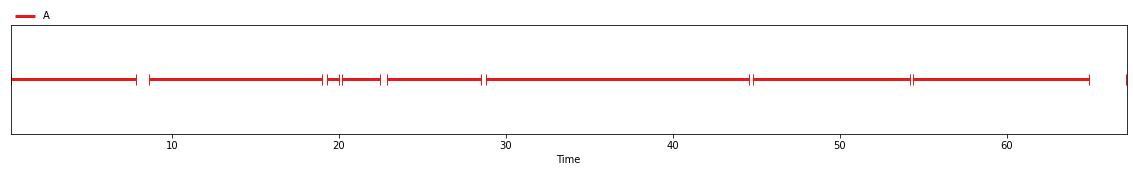

In [8]:
diarization

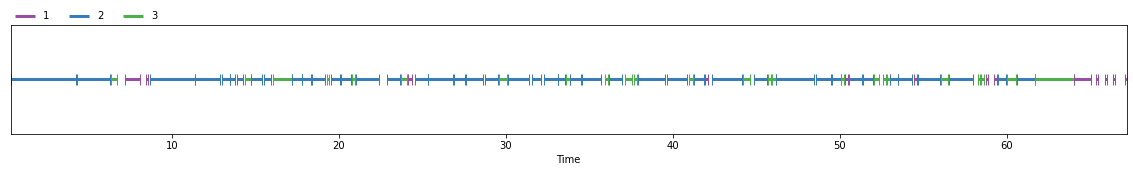

In [9]:
groundtruth

In [ ]:
from pyannote.database.util import load_rttm
rttm = load_rttm('/home/jovyan/work/uis-rnn-voxsrc20/lists/voxconverse/sample.rttm')[test_file['uri']]
test_file['uri']

In [ ]:
from pyannote.audio.features import RawAudio
from pyannote.core import Segment, notebook
from IPython.display import Audio

# make notebook visualization zoom on 600s < t < 660s time range
# EXCERPT = Segment(600, 660)
# notebook.crop = EXCERPT

# visualize excerpt groundtruth
groundtruth

file = {'uri': test_file['uri'], 'audio': test_file['audio']}

# load audio waveform, crop excerpt, and play it
waveform = RawAudio(sample_rate=16000)(file).data
Audio(data=waveform.squeeze(), rate=16000, autoplay=True)

In [ ]:
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f'Speaker "{speaker}" speaks between t={turn.start:.1f}s and t={turn.end:.1f}s.')

mapping = metric.optimal_mapping(groundtruth, diarization)
diarization.rename_labels(mapping=mapping)